# Lab 1: Multi-armed Bandits

This lab explores the multi-armed bandit problem, where an agent must choose among multiple options (arms) with unknown reward distributions to maximize its cumulative reward over time.

In [91]:
%pylab inline
from scipy.stats import norm

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.12/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['choice', 'norm', 'random', 'seed', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [110]:
# Number of bandit arms
K = 50 # @param {"type":"integer"}
# Number of trials (time steps)
T = 1000  # @param {"type":"integer"}

# Random seed
seed = 0

Text(0.5, 1.02, 'Unknown Reward Distributions for K Bandits')

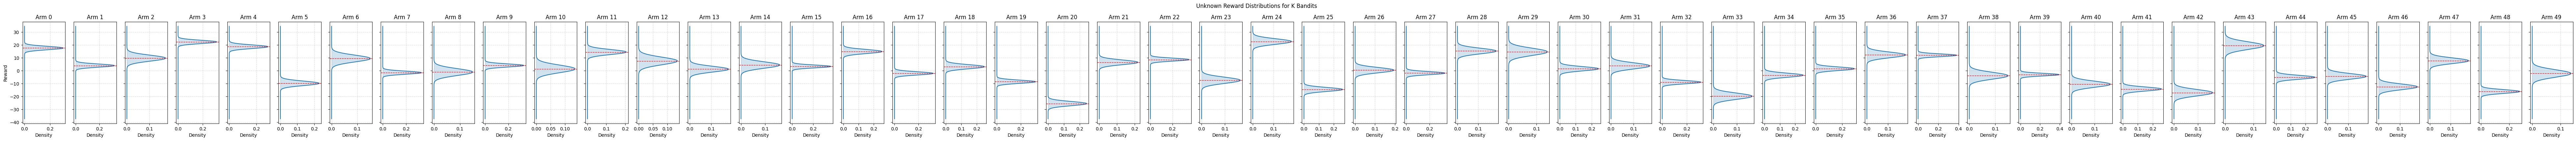

In [111]:
# Stattionary probability distribution for K bandits
np.random.seed(seed)
bandit_mean = 10 * np.random.normal(size=K)
bandit_std = np.random.uniform(1, 3, size=K)




###### Plot disttributions #######
fig, axes = plt.subplots(1, K, figsize=(2*K, 4), sharey=True)

x_min = bandit_mean.min() - 4 * bandit_std.max()
x_max = bandit_mean.max() + 4 * bandit_std.max()
x = np.linspace(x_min, x_max, 500)

for i, ax in enumerate(axes):
    y = norm.pdf(x, loc=bandit_mean[i], scale=bandit_std[i])
    ax.plot(y, x, color="C0")  # vertical orientation
    ax.fill_betweenx(x, 0, y, alpha=0.2, color="C0")
    ax.axhline(bandit_mean[i], color="r", linestyle="--", linewidth=1)  # mean
    ax.set_title(f"Arm {i}")
    ax.set_xlabel("Density")
    if i == 0:
        ax.set_ylabel("Reward")
    ax.grid(True, linestyle="--", alpha=0.5)
plt.suptitle("Unknown Reward Distributions for K Bandits", y=1.02)


Text(0, 0.5, 'Reward')

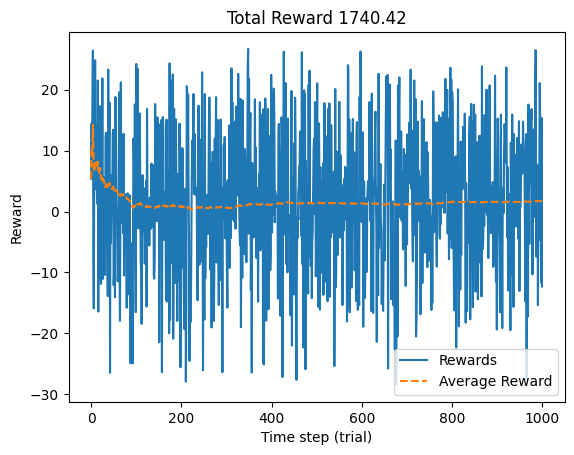

In [112]:
# Rewards
rewards = []

# For T trials, chose a random arm
for t in range(T):
  # Action: Choose a random arm
  a = np.random.randint(0, K-1)

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)


# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")




## Exercise 1: Implement Your Own Bandit Policy

In the previous cells, we simulated a multi-armed bandit problem and observed the rewards obtained by choosing arms randomly. While this gives us a baseline, a random policy is unlikely to be the most effective way to maximize rewards.

Your task is to implement your own policy for selecting which bandit arm to pull at each time step `t`. The total reward should be higher than the

[np.float64(18.35105227990431), np.float64(5.444893319717484), np.float64(12.605558229366258), np.float64(22.395757622036843), np.float64(16.71498972536738), np.float64(-7.8771089347081755), np.float64(7.217167922529966), np.float64(-1.8938297057356739), np.float64(0.9378386066668241), np.float64(2.875509571084769), np.float64(-0.013192065704521694), np.float64(13.34813180351229), np.float64(5.790310721130778), np.float64(-0.23925266093444564), np.float64(3.366783671226168), np.float64(4.823309686763084), np.float64(15.914179442469871), np.float64(-2.3246769344360105), np.float64(2.178589626221639), np.float64(-6.461630690768381), np.float64(-28.677660094999624), np.float64(3.519406611481868), np.float64(10.04379536699754), np.float64(-7.8248604018759345), np.float64(18.50546295684697), np.float64(-14.240611641201314), np.float64(0.7603362236283682), np.float64(-2.888981675295705), np.float64(15.426530256178776), np.float64(12.564020961103425), np.float64(1.8455147139804935), np.float6

Text(0, 0.5, 'Reward')

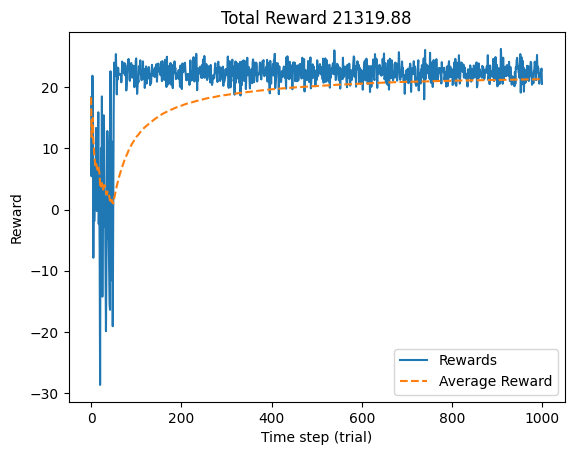

In [118]:
# Rewards
rewards = []
actions = [0] * K
rewards_ind = [[] for _ in range(K)]
rewards_mean = [0.0] * K


# For T trials, chose a random arm
for t in range(T):

    # if sum(actions) < K * 4:
    #     available = [i for i in range(K) if actions[i] < 4]
    #     a = np.random.choice(available)
    # else:
    #     # choose arm with best reward mean
    if t < K: a =t
    else: a = np.argmax(rewards_mean)

    actions[a] += 1

    # Reward
    r = np.random.normal(bandit_mean[a], bandit_std[a])
    rewards.append(r)
    rewards_ind[a].append(r)  # fixed index

    for i in range(len(rewards_ind)):
        if actions[i] > 0:
            rewards_mean[i] = sum(rewards_ind[i]) / actions[i]



# Total reward
print(rewards_mean)

print(actions)
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")



## Exercise 2: Greedy strategy


1. Implement the greedy strategy: Always choose the arm with the highest estimated average reward.

2. Implement the Epsilon-greedy strategy: with a small probability epsilon, choose a random arm; otherwise, choose the greedy arm.

3. [Optional for 337] Implement Thompson Sampling: Maintain a probability distribution over the expected reward for each arm and sample from these distributions to choose an arm.



[np.float64(17.70972963052427), np.float64(4.289778438700728), np.float64(8.075126069633866), np.float64(22.419535457083942), np.float64(19.512945954481026), np.float64(-10.914163466462366), np.float64(6.8186481389972515), np.float64(-1.5236131968100242), np.float64(-1.7566905293483241), np.float64(5.262542827081193), np.float64(2.3704190260392872), np.float64(15.508976224145794), np.float64(8.369434086644773), np.float64(7.092004370588548), np.float64(9.206040218593962), np.float64(2.8349837255609716), np.float64(13.091181592101364), np.float64(-0.7714888498430839), np.float64(3.5210035815252096), np.float64(-10.025699926272761), np.float64(-24.230204729751527), np.float64(8.349149328981474), np.float64(10.899225679888582), np.float64(-8.315466974860088), np.float64(21.058661913256802), np.float64(-11.54779994020921), np.float64(0.9287449045484164), np.float64(-2.196697661622566), np.float64(16.478517788604936), np.float64(14.336301669076219), np.float64(1.5574943112357922), np.float6

Text(0, 0.5, 'Reward')

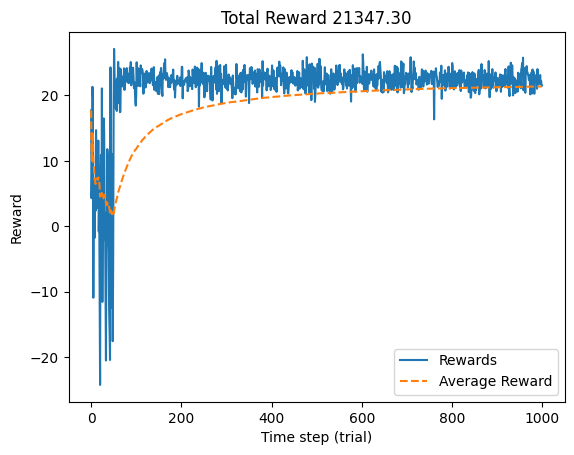

In [120]:
import random
# Rewards

rewards = []
actions = [0] * K
rewards_ind = [[] for _ in range(K)]
rewards_mean = [0.0] * K

epsi = 0.001
choice = 0


# For T trials, chose a random arm
for t in range(T):

    # if sum(actions) < K * 4:
    #     available = [i for i in range(K) if actions[i] < 4]
    #     a = np.random.choice(available)
    # else:
    #     # choose arm with best reward mean
    choice = random.choices([0, 1], weights=[1-epsi, epsi])[0]
    if t < K:
      a = t
    else:
      if choice == 0:
        a = np.argmax(rewards_mean)
      else:
        a =  np.random.randint(0, K-1)
    actions[a] += 1

    # Reward
    r = np.random.normal(bandit_mean[a], bandit_std[a])
    rewards.append(r)
    rewards_ind[a].append(r)  # fixed index

    for i in range(len(rewards_ind)):
        if actions[i] > 0:
            rewards_mean[i] = sum(rewards_ind[i]) / actions[i]



# Total reward
print(rewards_mean)

print(actions)
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")


# Questions
After compleing the excercises, answer the following questions:

1. In the epsilon-greedy strategy, compare ε = 0.1 and ε = 0.001. What are the advantages of using a larger ε?
2. If the reward distribution changes smoothly over time, is a purely greedy strategy still effective?
3. How does the choice of ε affect the balance between exploration and exploitation in the long run?  
4. Suppose the number of arms increases significantly. How might this change the effectiveness of the epsilon-greedy strategy?  

1. For Epsilon = 0.1, Im getting around 2100 to 2000 rewards. For Epsilon = 0.01, Im getting 2150 to 2250 rewards. The advantages of using a larger eps is that you also explore other arms, which could potentially gives you a better result, and also the algorithms wont be choosing arm 3 all the time. But in this case, the reason why we are getting more rewards with low epsilon is that the reward distribution is a constant which makes it more reward to just choose arm 3.

2. If the reward distribution changes over time, purely greedy would not be effective, since you wont always choose the one with best distribution. In this case, we should use Epsilon-greedy to explore other arms more.

3. Epsilon-greedy is actually good in exploration since it will explore other choices. It would be especially helpful for changing reward distribution situation. For pure greedy, we are getting high exploitation since it would always choose the arm with the highest avg reward. If we have a high value epsilon, we can break the exploitation, but we wont really improve the reward in this case with.constant distribution.

4. I tried with K = 50 with T=1000, the result of epsilon-greedy is similar to normal greedy. If the number of arms increases significantly, epsilon-greedy may be more effective in the case of constant reward distribution, since it has more potential to break the exploitation(we might have multiple are with similar high reward distribution). In case when we have changing reward distribution of each arm, epsilon-greedy would be even more effective.
